# **The Sparks Foundation - Graduate Rotational Internship Program**
## **Batch November 2021**
## **Data Science and Business Analytics Domain**
### **Task 6**
### **Submitted by Mainak Karmakar**

# **Prediction using Decision Tree Algorithm**

# **Importing the necessary modules**

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# **Loading the dataset**

In [41]:
Iris_df = pd.read_csv("/content/Iris.csv",index_col='Id')

In [42]:
print(Iris_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

# **Exploratory Data Analysis of the Data Set**

### **Information about the data types of the attributes**

In [43]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### **Description of the Data**

In [44]:
Iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Checking for null values and visualizing it**

In [45]:
Iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

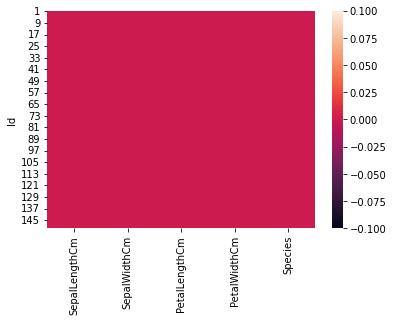

In [46]:
sns.heatmap(Iris_df.isnull())

As we can see from the null function and also the heatmap, there is no missing values in the

In [47]:
IDf = Iris_df.groupby(['Species'])

In [48]:
IDf[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].agg(['mean','median'])

SepalLengthCm        SepalWidthCm  ... PetalLengthCm PetalWidthCm       
                         mean median         mean  ...        median         mean median
Species                                            ...                                  
Iris-setosa             5.006    5.0        3.418  ...          1.50        0.244    0.2
Iris-versicolor         5.936    5.9        2.770  ...          4.35        1.326    1.3
Iris-virginica          6.588    6.5        2.974  ...          5.55        2.026    2.0

[3 rows x 8 columns]

We can see here that mean and median values of **sepal length**, **sepal width**, **petal length** and **petal width** all in cms from **each species** of **Iris Flower**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


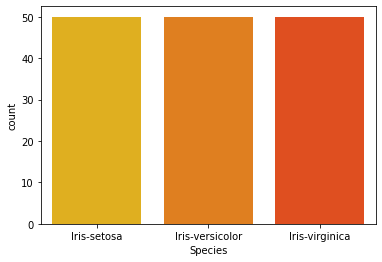

In [49]:
sns.countplot(Iris_df['Species'], palette='autumn_r')

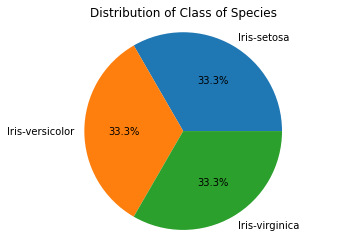

In [50]:
plt.pie(Iris_df['Species'].value_counts(),labels=Iris_df['Species'].unique(),autopct='%1.1f%%')
plt.title('Distribution of Class of Species')
plt.axis('equal')
plt.show()

We see here that all three species of Iris flowers have equal number of data in this dataset.

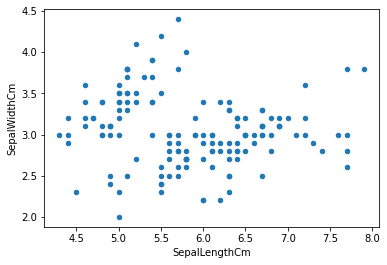

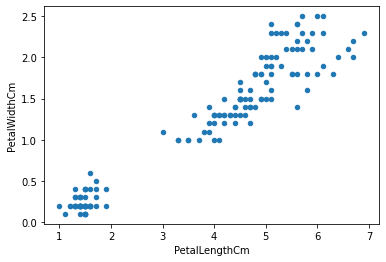

In [51]:
Iris_df.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm')
Iris_df.plot(kind='scatter', x='PetalLengthCm',y='PetalWidthCm')

We have plotted Sepal Width on Sepal Length as well as Petal Width on Petal Length of the different species of Iris flowers, but we cannot distinguish between the species from this graph.

### **We distinguish between the species in the following graphs**

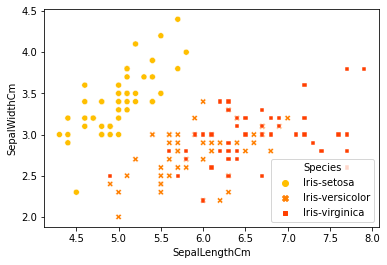

In [52]:
sns.scatterplot(x=Iris_df['SepalLengthCm'],y=Iris_df['SepalWidthCm'],hue=Iris_df['Species'],style=Iris_df['Species'],palette='autumn_r')

We see that Sepal Widths of Iris-setosa is higher compared to Iris-versicolor or Iris-virginica species, whereas Sepal Lengths of Iris-versicolor and Iris-virginica is higher compared to Iris-setosa

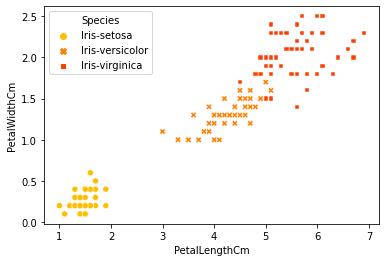

In [53]:
sns.scatterplot(x=Iris_df['PetalLengthCm'],y=Iris_df['PetalWidthCm'],hue=Iris_df['Species'],style=Iris_df['Species'],palette='autumn_r')

We see that both Petal Widths and Petal Lengths of Iris-setosa is lowest compared to Iris-versicolor or Iris-virginica species. Petal Lengths and Petal Widths of Iris-versicolor is 2nd highest and Iris-virginica has the highest Petal Lengths and Widths compared to the other two.

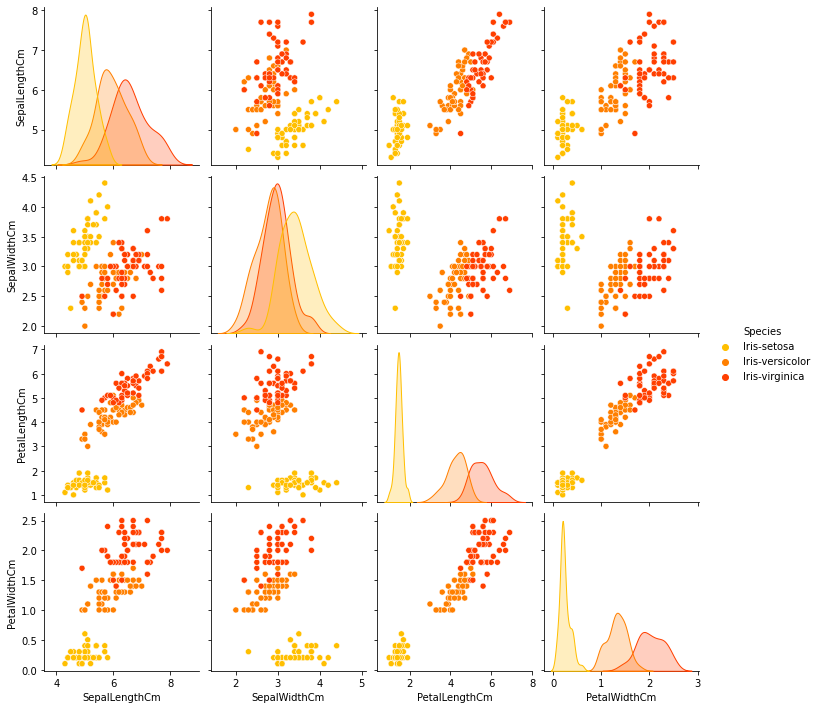

In [54]:
sns.pairplot(Iris_df, hue='Species', palette='autumn_r')

In [16]:
round(Iris_df.corr(),2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


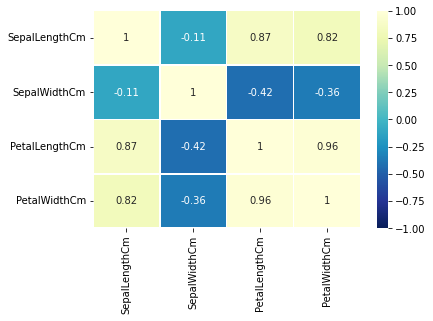

In [55]:
sns.heatmap(Iris_df.corr(),vmin=-1,vmax=1,cmap='YlGnBu_r',annot=True,linewidths=.5)

The heatmap shows correlation between all the four attributes.

# **Decision Tree Model Training and Prediction**

**Importing necessary modules needed for Model Training and Prediction**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix

##Splitting the data into training and testing set

In [57]:
train, test = train_test_split(Iris_df, test_size = 0.2,random_state=1)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In this our main data is split into train and test the attribute test_size=0.2 splits the data into 80% and 20% ratio. Train=80% and Test=20%

In [58]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

## **Gini Index Decision Tree Model**

In [59]:
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
prediction=model_gini.predict(test_X)
print('The accuracy of the Gini index Decision Tree is',accuracy_score(prediction,test_y))

The accuracy of the Gini index Decision Tree is 0.9666666666666667


In [61]:
export_graphviz(
model_gini,
out_file="model_gini.dot",
feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
rounded=True,
impurity=True,
filled=True
)

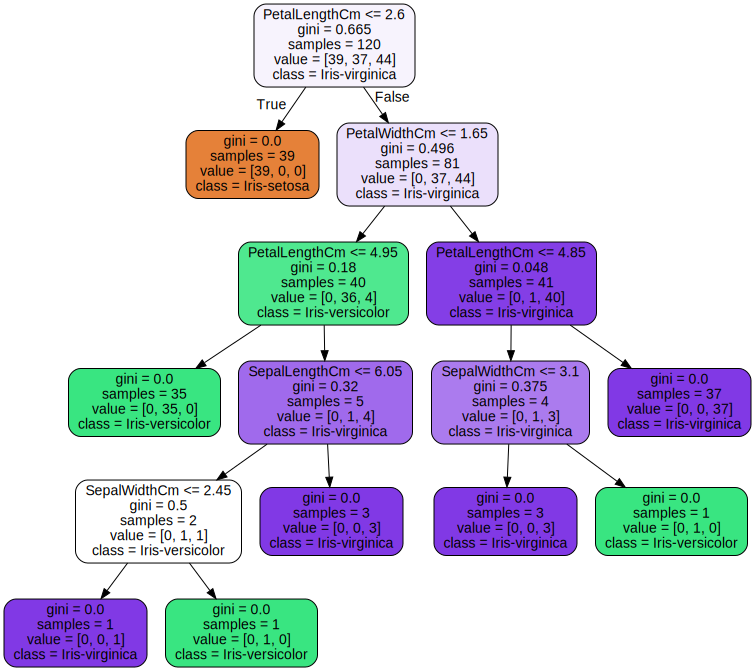

In [62]:
import graphviz
with open("model_gini.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [63]:
model_gini.predict_proba([[2.5,4.5,3.1,7.5]])

array([[0., 1., 0.]])

In [64]:
model_gini.predict([[2.5,4.5,3.1,7.5]])

array(['Iris-versicolor'], dtype=object)

>Step 1: Depth = 0 Petal Length <= 2.6? NO! Go to right subtree (PL = 3.1)

>Step 2: Depth = 1 Petal Width <= 1.6? NO! Go to right subtree (PW = 7.5)

>Step 3: Depth = 2 Petal Length <= 4.85? YES! Go to left subtree (PL = 3.1)

>Step 4: Depth = 3 Sepal Width <= 3.1? NO! Go to right subtree (SW = 4.5)

>**Classified as Iris-Versicolor**



## **Entropy Decision Tree Model**

In [65]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
prediction = model_entropy.predict(test_X)
print('The accuracy of the Entropy Decision Tree is',accuracy_score(prediction,test_y))

The accuracy of the Entropy Decision Tree is 0.9666666666666667


In [67]:
export_graphviz(
model_entropy,
out_file="model_entropy.dot",
feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
rounded=True,
impurity=True,
filled=True
)

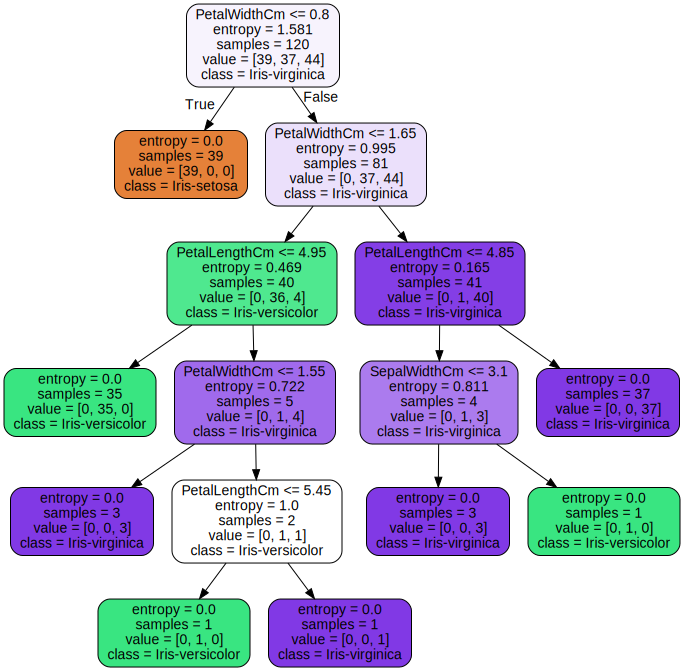

In [68]:
import graphviz
with open("model_entropy.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [69]:
model_entropy.predict_proba([[4.5,1.5,3.1,3.5]])

array([[0., 0., 1.]])

In [70]:
model_entropy.predict([[4.5,1.5,3.1,3.5]])

array(['Iris-virginica'], dtype=object)

>Step 1: Depth = 0 Petal Length <= 2.6? NO! Go to right subtree (PL = 3.1)

>Step 2: Depth = 1 Petal Width <= 1.6? NO! Go to right subtree (PW = 3.5)

>Step 3: Depth = 2 Petal Length <= 4.85? YES! Go to left subtree (PL = 3.1)

>Step 4: Depth = 3 Sepal Width <= 3.1? YES! Go to left subtree (SW = 1.5)

>**Classified as Iris-Virginica**



# **Conclusion**

### **The prediction accuracy of the Decision Tree with as a Gini index model and Entropy model is the same, with the score of 96%. So we can use either one to make Iris Species predictions for and given new data.**